In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('data/bicikelj_preprocessed.csv', index_col=0, parse_dates=True)
data.head(3)

/var/folders/09/wzk7fjx960ndthy_kpgk7vqr0000gn/T/ipykernel_66581/804187918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('data/bicikelj_preprocessed.csv', index_col=0, parse_dates=True)


,timestamp,station,target,time_of_day_sin,time_of_day_cos,temperature,precipitation,snow_depth,cloud_cover,is_day,...,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,position_lat,position_lon,distance_to_center,is_weekend
0,2022-08-02 13:35:00,ALEJA - CELOVŠKA CESTA,1,-0.402747,-0.915311,14.9,0.0,0.0,31.0,0.0,...,False,20,9,11,OPEN,1702663252000,46.077302,14.482581,3.39777,False
1,2022-08-02 13:44:00,ALEJA - CELOVŠKA CESTA,0,-0.438371,-0.898794,14.9,0.0,0.0,31.0,0.0,...,False,20,9,11,OPEN,1702663252000,46.077302,14.482581,3.39777,False
2,2022-08-02 13:55:00,ALEJA - CELOVŠKA CESTA,0,-0.480989,-0.876727,14.9,0.0,0.0,31.0,0.0,...,False,20,9,11,OPEN,1702663252000,46.077302,14.482581,3.39777,False


In [3]:
FRATURES = ['station', 'time_of_day_sin', 'time_of_day_cos',
       'temperature', 'precipitation', 'snow_depth', 'cloud_cover', 'is_day',
       'praznik', 'poletne_pocitnice', 'zimske_pocitnice',
       'day_of_week', 'daily_lag_1', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'number', 'bike_stands', 'last_update', 'position_lat', 'position_lon',
       'distance_to_center', 'is_weekend']
TARGET = "target"

In [4]:
d = data[FRATURES + [TARGET]].copy()

In [5]:
d["station"] = d["station"].astype("category")
# transform station into one-hot encoding
d_encoded = pd.get_dummies(d, columns=["station"])

In [6]:
d_tmp = d.drop(columns=["station"])

<Figure size 2000x2000 with 0 Axes>

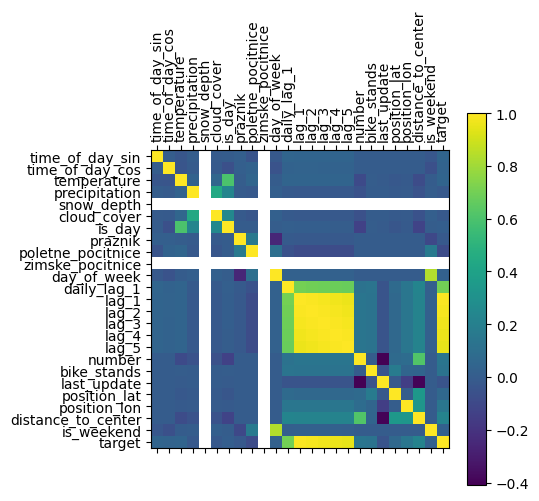

In [7]:
# compute the correlation matrix
corr = d_tmp.corr()
corr

# plot the heatmap
plt.figure(figsize=(20,20))
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [8]:
# set time and station as index
data = data.set_index(["timestamp"])
data.sort_index(inplace=True)

<Axes: title={'center': 'Available bikes at Aleja'}, xlabel='timestamp'>

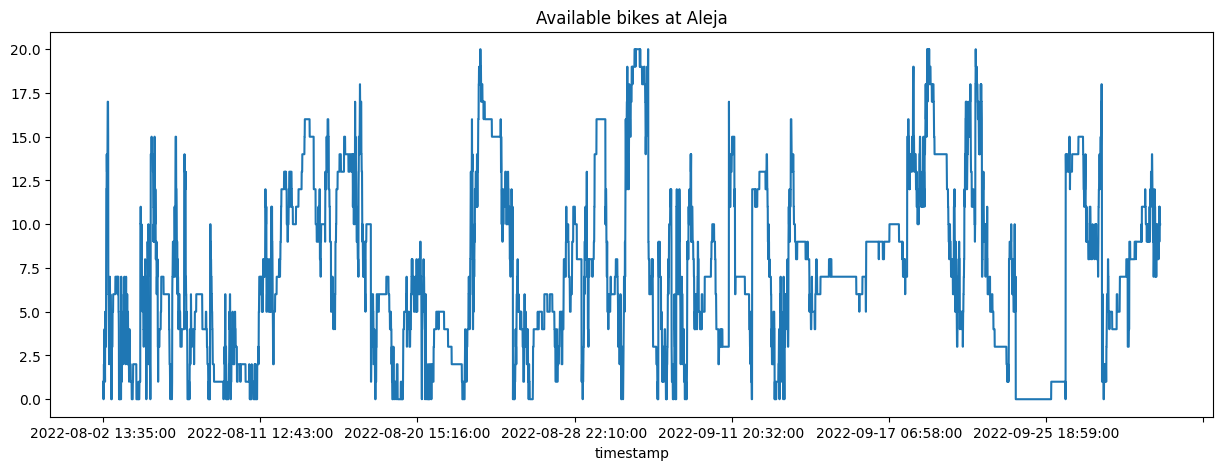

In [9]:
aleja = data[data.station == "ALEJA - CELOVŠKA CESTA"].drop(columns=["station", "status"])
aleja.target.plot(figsize=(15, 5), title="Available bikes at Aleja")

<Axes: title={'center': 'Available bikes at Kolezija'}, xlabel='timestamp'>

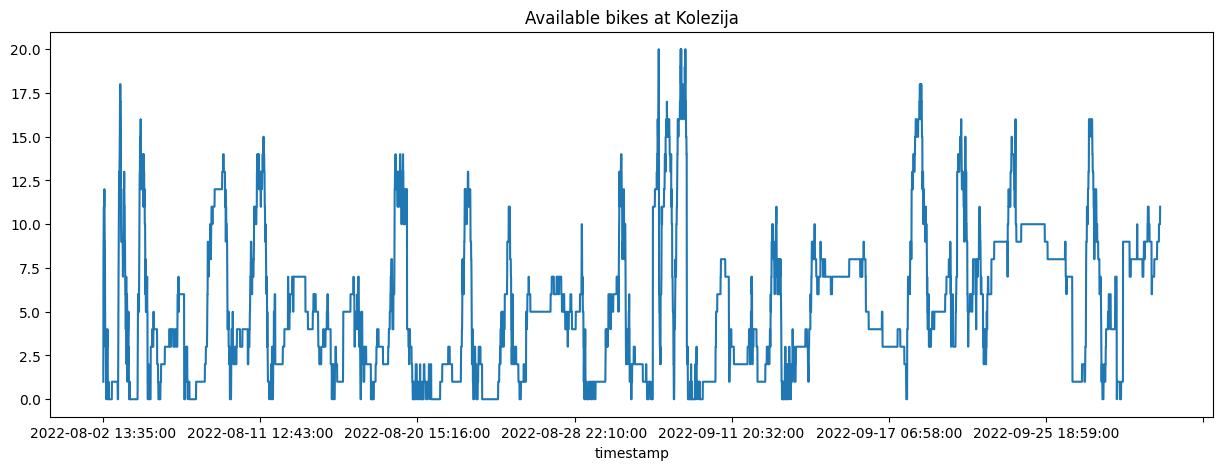

In [10]:
aleja = data[data.station == "KOPALIŠČE KOLEZIJA"].drop(columns=["station", "status"])
aleja.target.plot(figsize=(15, 5), title="Available bikes at Kolezija")

<Axes: title={'center': 'Available bikes at Prešernov trg'}, xlabel='timestamp'>

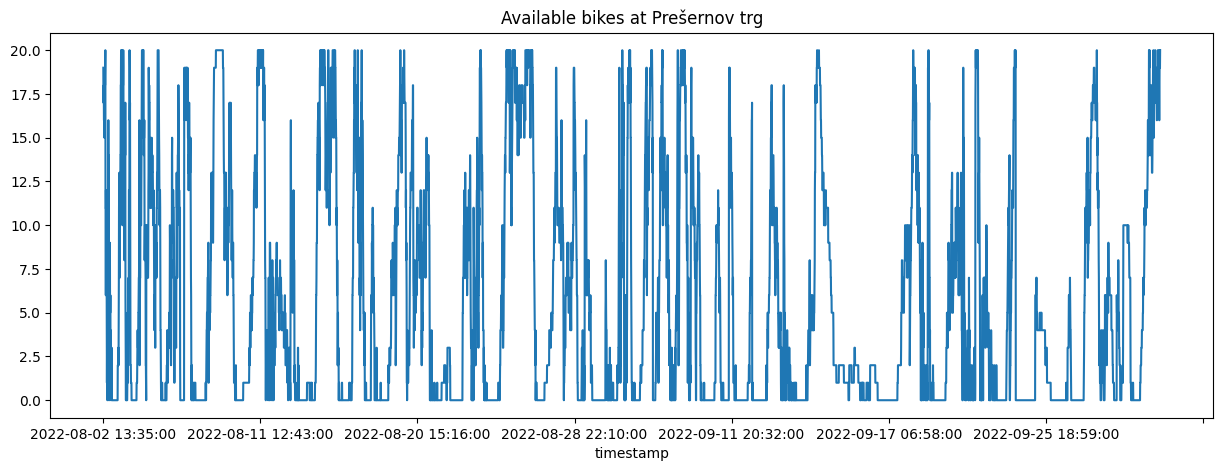

In [11]:
aleja = data[data.station == "PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE"].drop(columns=["station", "status"])
aleja.target.plot(figsize=(15, 5), title="Available bikes at Prešernov trg")